In [1]:
import numpy as np
from matplotlib import pyplot as plt

Define the problem parameters


In [2]:
A = np.array([[1, 3], [3, 1]]) # low dimensions to plot it, you can test larger sizes
b = np.array([-1, 2])

lmbda = 0.5


The function to be minimized is $\frac{1}{2}\|Ax-b\|_2^2 + \lambda \|x\|_1$

In [3]:
f = lambda x: 0.5 * np.sum((A @ x - b) ** 2)
F = lambda x: f(x) + lmbda * np.sum(np.abs(x))

# derivative of f from matrix calculus
df = lambda x: A.T @ (A @ x) - A.T @ b


Plot the function

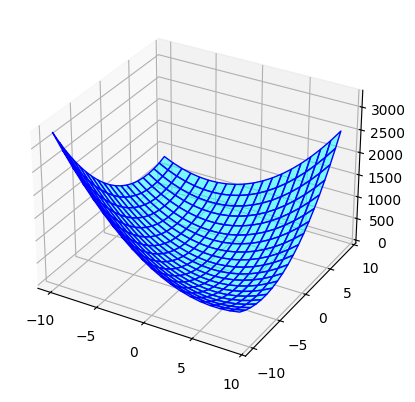

In [4]:
# this function has been prepared only for the visualization sake, no need to go through this but it renders some nice
# graphics :)
Fplot = lambda r1, r2: (r1 * A[0, 0] + r2 * A[0, 1] - b[0]) ** 2 + (r1 * A[1, 0] + r2 * A[1,1] - b[1]) ** 2 + lmbda * (np.abs(r1) + np.abs(r2))
xx, yy = np.meshgrid(np.arange(-10, 10, 1), np.arange(-10, 10, 1))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, Fplot(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])

ISTA with backtracking
----------------------------
Parameters of ISTA

In [5]:
MAX_ITER = 1e3
TOL_DIST_X = 1e-6
# initial value for alpha
alpha = 1
# parameter for backtracking
eta = 0.99

Initialization: test different inizializations, the function is convex, you always converge to the same solution

In [6]:
x = np.array([-5, 10])

grad_norm = 1e10
distanceX = 1e10

# initialize the list with all the estimates
all_x = [x]
x_past = x

Main loop

In [7]:
(f(x) > f(all_x[-1]) + df(all_x[-1])).all()

np.False_

In [8]:
(x - all_x[-1] > (1/(2*alpha))*np.linalg.norm(x - all_x[-1])).all()

np.False_

In [9]:
cnt = 0
while cnt < MAX_ITER and distanceX > TOL_DIST_X:
    
    # compute the argument of the proximal operator
    x = x - (alpha * df(x))
    
    # perform soft thresholding of x
    x = np.sign(x) * np.maximum(0,np.abs(x)-(lmbda*alpha))

    # iterate the backtracking procedure until the stopping criterion is met
    cnt = cnt + 1
    while f(x) > (f(all_x[-1]) + ((df(all_x[-1]).T @ (x - all_x[-1]))) + ((1/(2*alpha))*(np.linalg.norm(x - all_x[-1]))**2)):
        # update alpha
        alpha = eta * alpha
        
        # compute again x
        x = all_x[-1] - alpha * df(all_x[-1])
        
        # perform soft thresholding
        x = np.sign(x) * np.maximum(0,np.abs(x)-(lmbda*alpha))

    # compute the stopping criteria
    distanceX = np.linalg.norm(x - all_x[-1])

    # store the estimate
    all_x.append(x)


Plot all the estimates

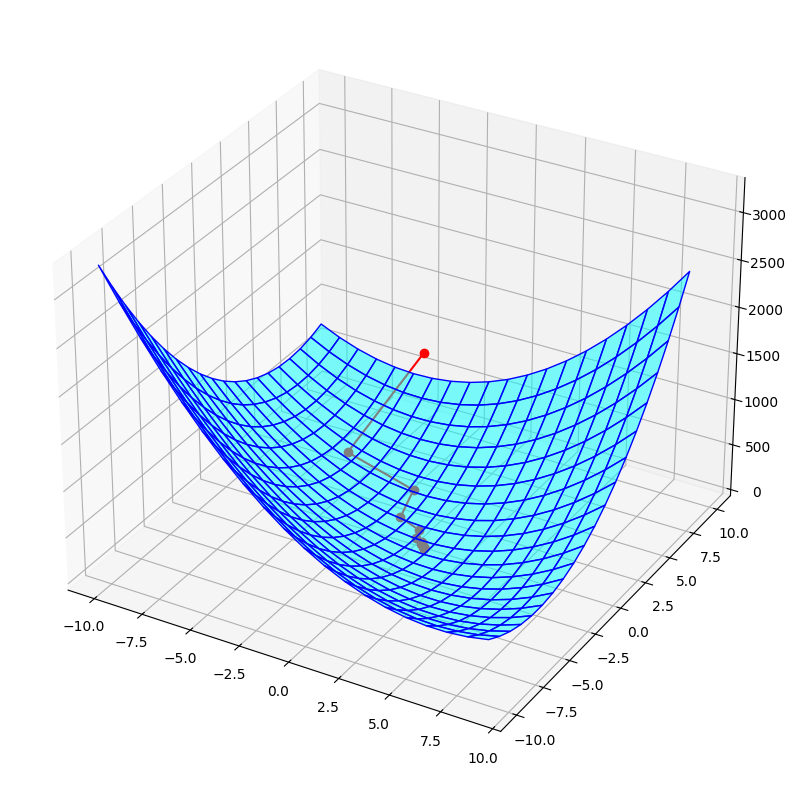

In [10]:
# plot the new estimate
xxplot = [x[0] for x in all_x]
yyplot = [x[1] for x in all_x]
zzplot = Fplot(np.array(xxplot), np.array(yyplot))

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, Fplot(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])
ax.plot3D(xxplot, yyplot, zzplot, 'r-o')

Compare the number of iteration needed for convergence with backtracking with the number of iteration required using the optimal alpha

In [11]:
print(f'nr of iteration of ISTA with backtracking (before stopping criteria met): {cnt}\n')
print(f'Solution of ISTA: [{x[0]:.4f}, {x[1]:.4f}]\n')
print(f'Value of the functional: {F(x):.4f}\n')

nr of iteration of ISTA with backtracking (before stopping criteria met): 34

Solution of ISTA: [0.7500, -0.5000]

Value of the functional: 0.6875



FISTA
-----
Parameters of FISTA

In [12]:
MAX_ITER = 1e3
TOL_DIST_X = 1e-6
# set the optimal value for alpha
alpha = 1

Initialization: test different inizializations, the function is convex, you always converge to the same solution

In [13]:
# initialize x
x = np.array([-5, 10])

# initialize y
y = np.array([-5, 10])

# initialize gamma
L = max(np.linalg.eigvals(np.matmul(A.T, A)))
gamma = 1/L

grad_norm = 1e10
distanceX = 1e10

# initialize the list with all the estimates
all_x = [x]
all_y = [y]


Main loop

In [14]:
cnt = 0
while cnt < MAX_ITER and distanceX > TOL_DIST_X:
    # compute the argument of the proximal operator
    x = y - (gamma * df(y))
    
    # perform soft thresholding of x
    x = np.sign(x) * np.maximum(0,np.abs(x)-(lmbda*gamma))

    # update alpha
    old_alpha = alpha
    alpha = (1+ np.sqrt(1+4*old_alpha**2))/2

    # update y
    y = x + ((old_alpha-1)/(alpha))*(x - all_x[-1])

    # compute the stopping criteria
    distanceX = np.linalg.norm(x - all_x[-1])
    cnt = cnt + 1

    # store the estimate
    all_x.append(x)
    all_y.append(y)
      

Plot all the estimates

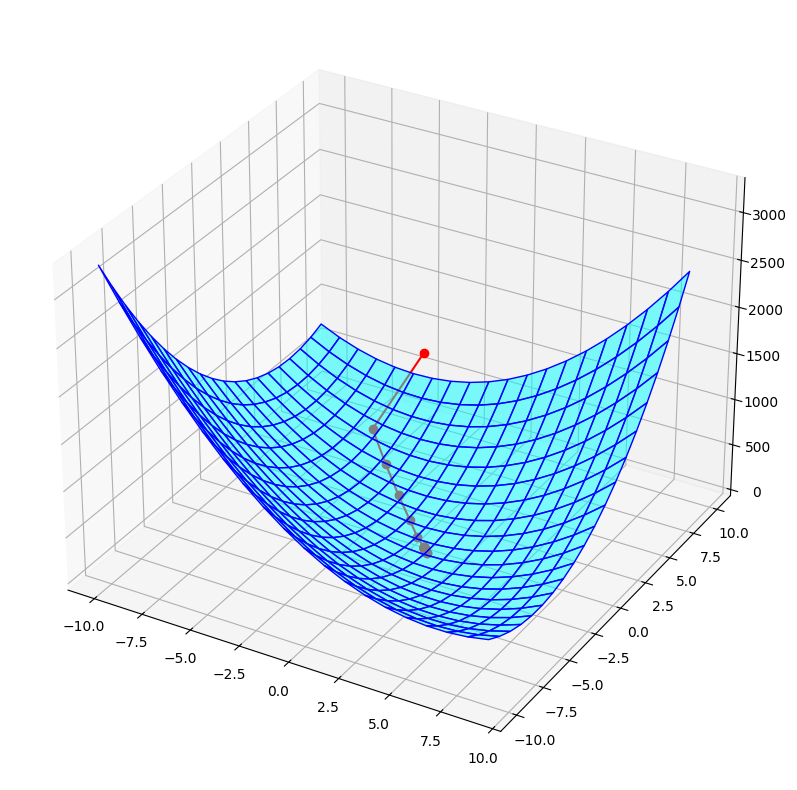

In [15]:
# plot the new estimate
xxplot = [x[0] for x in all_x]
yyplot = [x[1] for x in all_x]
zzplot = Fplot(np.array(xxplot), np.array(yyplot))

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, Fplot(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])
ax.plot3D(xxplot, yyplot, zzplot, 'r-o')

In [16]:
print(f'nr of iteration of FISTA (before stopping criteria met): {cnt}\n')
print(f'Solution of FISTA: [{x[0]:.4f}, {x[1]:.4f}]\n')
print(f'Value of the functional: {F(x):.4f}\n')

nr of iteration of FISTA (before stopping criteria met): 69

Solution of FISTA: [0.7500, -0.5000]

Value of the functional: 0.6875

